dict_keys(['loss', 'accuracy', 'binary_crossentropy', 'val_loss', 'val_accuracy', 'val_binary_crossentropy']) 

5000/5000 [==============================] - 0s 11us/sample - loss: 0.1351 - accuracy: 0.9442 - binary_crossentropy: 0.1351
[0.13511059445142745, 0.9442, 0.13511054]
5000/5000 [==============================] - 0s 18us/sample - loss: 0.1351 - accuracy: 0.9442 - binary_crossentropy: 0.1351
[0.13511059445142745, 0.9442, 0.13511054]
5000/5000 [==============================] - 0s 18us/sample - loss: 0.1351 - accuracy: 0.9442 - binary_crossentropy: 0.1351
[0.13511059445142745, 0.9442, 0.13511054]
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 136       
______________________________________

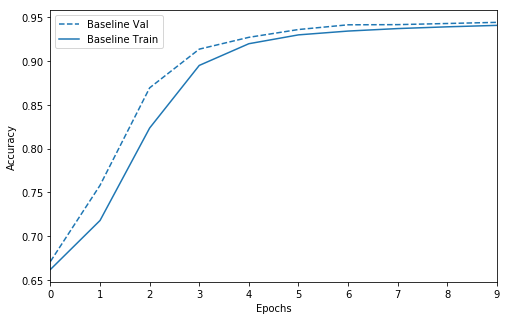

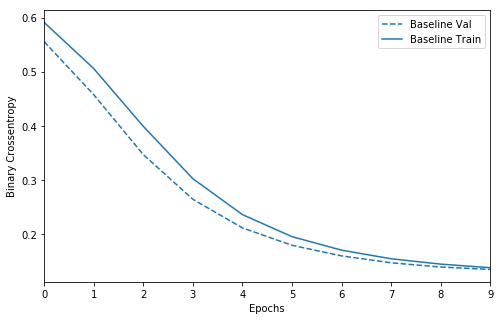

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as prep 


### lib_
def gen_train_label(rows, x_dim, y_dim):

    x_train = np.random.random([rows,x_dim])
    x_label = np.random.random([rows,y_dim])
    x_label.fill(0.0)

    for idx in range(rows):
        e_ = x_train[idx]

        e_c = (np.sqrt(e_[0] * e_[0] + e_[-1] * e_[-1]) > 0.66) * 1.0
        x_label[idx][int(e_c)] = 1.0

    return [x_train, x_label]

def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(8,5))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

def norm_x_y_data(X_train, X_test):
    #import sklearn.preprocessing as prep 
    preprocessor = prep.StandardScaler().fit(X_train)
    X_train = preprocessor.transform(X_train)
    X_test = preprocessor.transform(X_test)
    # X_train_R0=preprocessor.inverse_transform(X_test)    
    return [X_train, X_test]

def show_predict(y_test, y_label, y_predict):
    cnt_err = 0
    for i in range(len(y_test)):
        if np.argmax(y_label[i]) != np.argmax(y_predict[i]):
            print (y_test[i])
            print (y_label[i] , " vs " , y_predict[i])
            e_ =  y_test[i]
            print ("- diff is :" , np.abs(np.sqrt(e_[0] * e_[0] + e_[-1] * e_[-1]) - 0.66))
            cnt_err += 1
            print()
    print("- cnt error is ", cnt_err)
    print()

def get_mm_filesize(param_num):
    R0 = 33.9765625
    each_size = 0.01171875
    return R0 + param_num * each_size 

def gen_model(x_dim, y_dim):
#     baseline_model.compile(optimizer='adam',
#                        loss='binary_crossentropy',
#                        metrics=['accuracy', 'binary_crossentropy'])    


    baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(x_dim,)),
    keras.layers.Dense(8, activation=tf.nn.relu),
#     keras.layers.Dropout(0.2),
    keras.layers.Dense(y_dim, activation=tf.nn.sigmoid)
])
    
    
#     baseline_model.summary()
    baseline_model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.binary_crossentropy,
                metrics=['accuracy','binary_crossentropy'])
    
    
    return baseline_model    
    

def main():
    rows = 10000
    x_dim = 4
    y_dim = 2    
    [x_train, x_label] = gen_train_label(rows, x_dim, y_dim)
    [y_test, y_label] = gen_train_label(int(rows/2), x_dim, y_dim)
#     [x_train, y_test] = norm_x_y_data(x_train, y_test)
    
    baseline_model = gen_model(x_dim, y_dim)
    
    baseline_history = baseline_model.fit(x_train,
                                      x_label,
                                      epochs=10,
                                      batch_size=128,
                                      validation_data=(y_test, y_label),
                                      verbose=0)    
    plot_history( [ ('baseline', baseline_history) ], key="accuracy")   
    plot_history( [ ('baseline', baseline_history) ], key="binary_crossentropy")
    
    print(baseline_history.history.keys(), "\n")
    
    batch_size = 1000
    s_i = np.random.choice(range(len(y_test)), batch_size)
    y_predict = baseline_model.predict(y_test[s_i])
#     show_predict(y_test[s_i], y_label[s_i], y_predict)
    
    print (baseline_model.evaluate(y_test, y_label))
    
    
    
    baseline_model.save('./mm/h5.h5')
    baseline_model_new_h5 = tf.keras.models.load_model('./mm/h5.h5')
#     baseline_model_new_h5.summary()
    print (baseline_model_new_h5.evaluate(y_test, y_label))
    
    baseline_model.save_weights('./mm/ckpt')
    baseline_model_new_ckp = gen_model(x_dim, y_dim)
#     baseline_model_new_ckp.summary()
    baseline_model_new_ckp.load_weights('./mm/ckpt')
    print (baseline_model_new_ckp.evaluate(y_test, y_label))
    baseline_model_new_ckp.summary()
    
    print ("- h5 networks filesize is : " , get_mm_filesize(baseline_model.count_params()) , " kbytes")
    return (baseline_history.history)
    
### lib_ end

x = main()



